In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Needed to process our augmented and oversampled dataset (Will combine ipynbs afterwards)
from PIL import Image, ImageEnhance, ImageOps
import os
import numpy as np
import random

# Define paths to the train and test directories
train_dir = 'Dataset/Train'
test_dir = 'Dataset/Test'

# Check if the directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory {train_dir} not found.")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory {test_dir} not found.")

# Function to load images from a directory and its subdirectories
def load_images_from_directory(directory):
    images = {}
    for root, _, files in os.walk(directory):
        class_name = os.path.basename(root)
        images[class_name] = []
        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(root, filename)
                with Image.open(img_path) as img:
                    img_array = np.array(img)
                    images[class_name].append(img_array)
    return images

# Load images from the train and test directories
train_images = load_images_from_directory(train_dir)
test_images = load_images_from_directory(test_dir)

# Print the number of images loaded for each class
for class_name, images in train_images.items():
    print(f"Loaded {len(images)} images from class {class_name} in {train_dir}")
for class_name, images in test_images.items():
    print(f"Loaded {len(images)} images from class {class_name} in {test_dir}")

if "Train" in train_images:train_images.pop("Train")
if "Test" in test_images:test_images.pop("Test")

print(train_images.keys())
print(test_images.keys())




def augment_image(image):
    # Convert numpy array to PIL Image
    pil_image = Image.fromarray(image)

    # Random rotation
    if random.random() > 0.5:
        angle = random.uniform(-30, 30)
        pil_image = pil_image.rotate(angle)

    # Random horizontal flip
    if random.random() > 0.5:
        pil_image = ImageOps.mirror(pil_image)

    # Random vertical flip
    if random.random() > 0.5:
        pil_image = ImageOps.flip(pil_image)

    # Random Gaussian noise
    if random.random() > 0.5:
        np_image = np.array(pil_image)
        mean = 0
        std = random.uniform(0, 25)
        gauss = np.random.normal(mean, std, np_image.shape).astype('uint8')
        np_image = np.clip(np_image + gauss, 0, 255)
        pil_image = Image.fromarray(np_image)

    # Convert PIL Image back to numpy array
    return np.array(pil_image)

# Apply augmentation to all images in the train_images dictionary
augmented_train_images = {}
for class_name, images in train_images.items():
    augmented_train_images[class_name] = [augment_image(image) for image in images]

# Print the number of augmented images for each class
for class_name, images in augmented_train_images.items():
    print(f"Augmented {len(images)} images for class {class_name}")

# Merge augmented images with original training images
for class_name, images in augmented_train_images.items():
    if class_name in train_images:
        train_images[class_name].extend(images)
    else:
        train_images[class_name] = images

# Count the number of images in each class for train and test datasets
train_counts = {class_name: len(images) for class_name, images in train_images.items()}
test_counts = {class_name: len(images) for class_name, images in test_images.items()}



# Step 1: Calculate the target number of images for each class (equal to the maximum class size)
max_class_size = max(train_counts.values())
print(f"Maximum class size: {max_class_size}")

# Step 2: Function to oversample a class by augmenting images
def oversample_class(images, target_size):
    augmented_images = []
    while len(images) + len(augmented_images) < target_size:
        # Augment the images to reach the target size
        image = random.choice(images)  # Randomly pick an image from the class
        augmented_image = augment_image(image)  # Augment the selected image
        augmented_images.append(augmented_image)
    return images + augmented_images

# Step 3: Oversample each class in the train_images dictionary
for class_name, images in train_images.items():
    if len(images) < max_class_size:
        # If the class has fewer images than the max_class_size, oversample it
        train_images[class_name] = oversample_class(images, max_class_size)
    print(f"Oversampled class {class_name} to {len(train_images[class_name])} images")

# Step 4: Recalculate the number of images in each class after oversampling
train_counts = {class_name: len(images) for class_name, images in train_images.items()}






Loaded 0 images from class Train in Dataset/Train
Loaded 3995 images from class angry in Dataset/Train
Loaded 436 images from class disgust in Dataset/Train
Loaded 4097 images from class fear in Dataset/Train
Loaded 7215 images from class happy in Dataset/Train
Loaded 4965 images from class neutral in Dataset/Train
Loaded 4830 images from class sad in Dataset/Train
Loaded 3171 images from class surprise in Dataset/Train
Loaded 0 images from class Test in Dataset/Test
Loaded 958 images from class angry in Dataset/Test
Loaded 111 images from class disgust in Dataset/Test
Loaded 1024 images from class fear in Dataset/Test
Loaded 1774 images from class happy in Dataset/Test
Loaded 1233 images from class neutral in Dataset/Test
Loaded 1247 images from class sad in Dataset/Test
Loaded 831 images from class surprise in Dataset/Test
dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
Augme

C:\Users\praty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


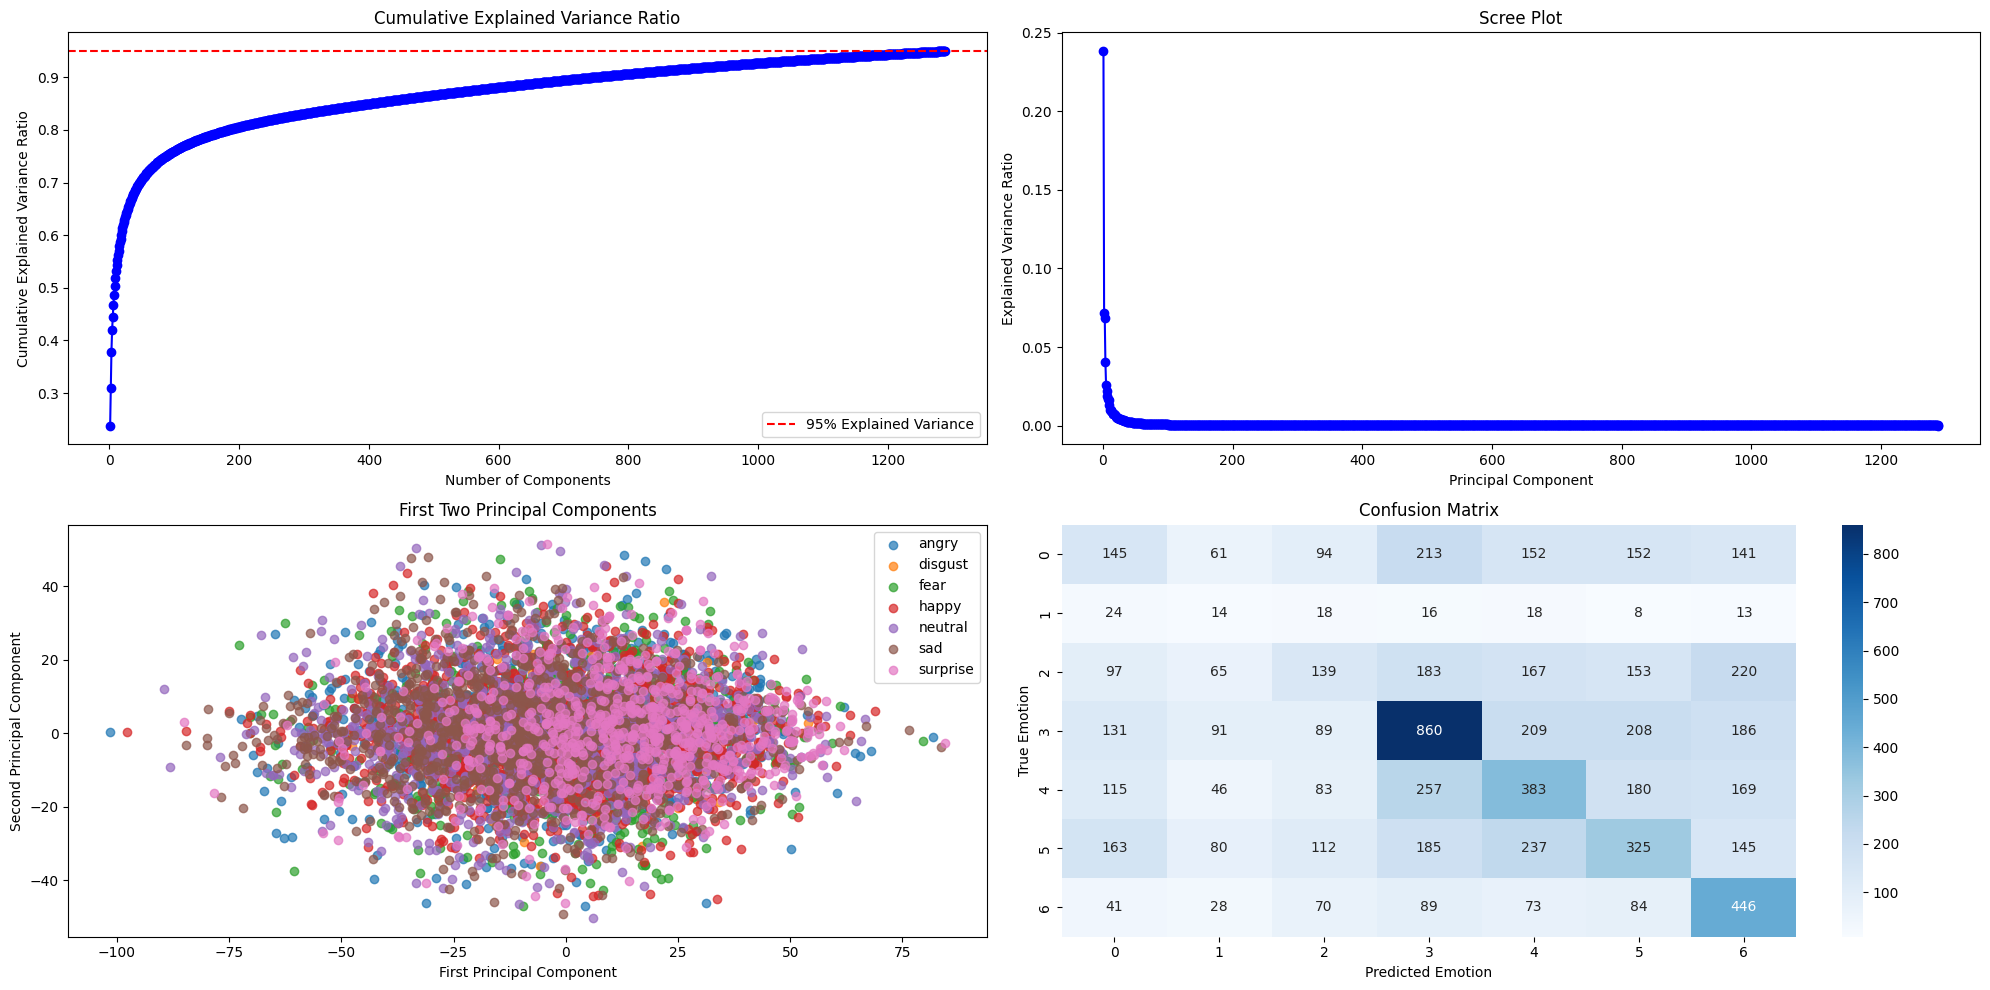


PCA Summary:
Number of components used: 1288
Total explained variance ratio: 0.9500

Classification Report:
              precision    recall  f1-score   support

       angry       0.20      0.15      0.17       958
     disgust       0.04      0.13      0.06       111
        fear       0.23      0.14      0.17      1024
       happy       0.48      0.48      0.48      1774
     neutral       0.31      0.31      0.31      1233
         sad       0.29      0.26      0.28      1247
    surprise       0.34      0.54      0.41       831

    accuracy                           0.32      7178
   macro avg       0.27      0.29      0.27      7178
weighted avg       0.32      0.32      0.32      7178

Total explained variance: 0.9500308486456037


C:\Users\praty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


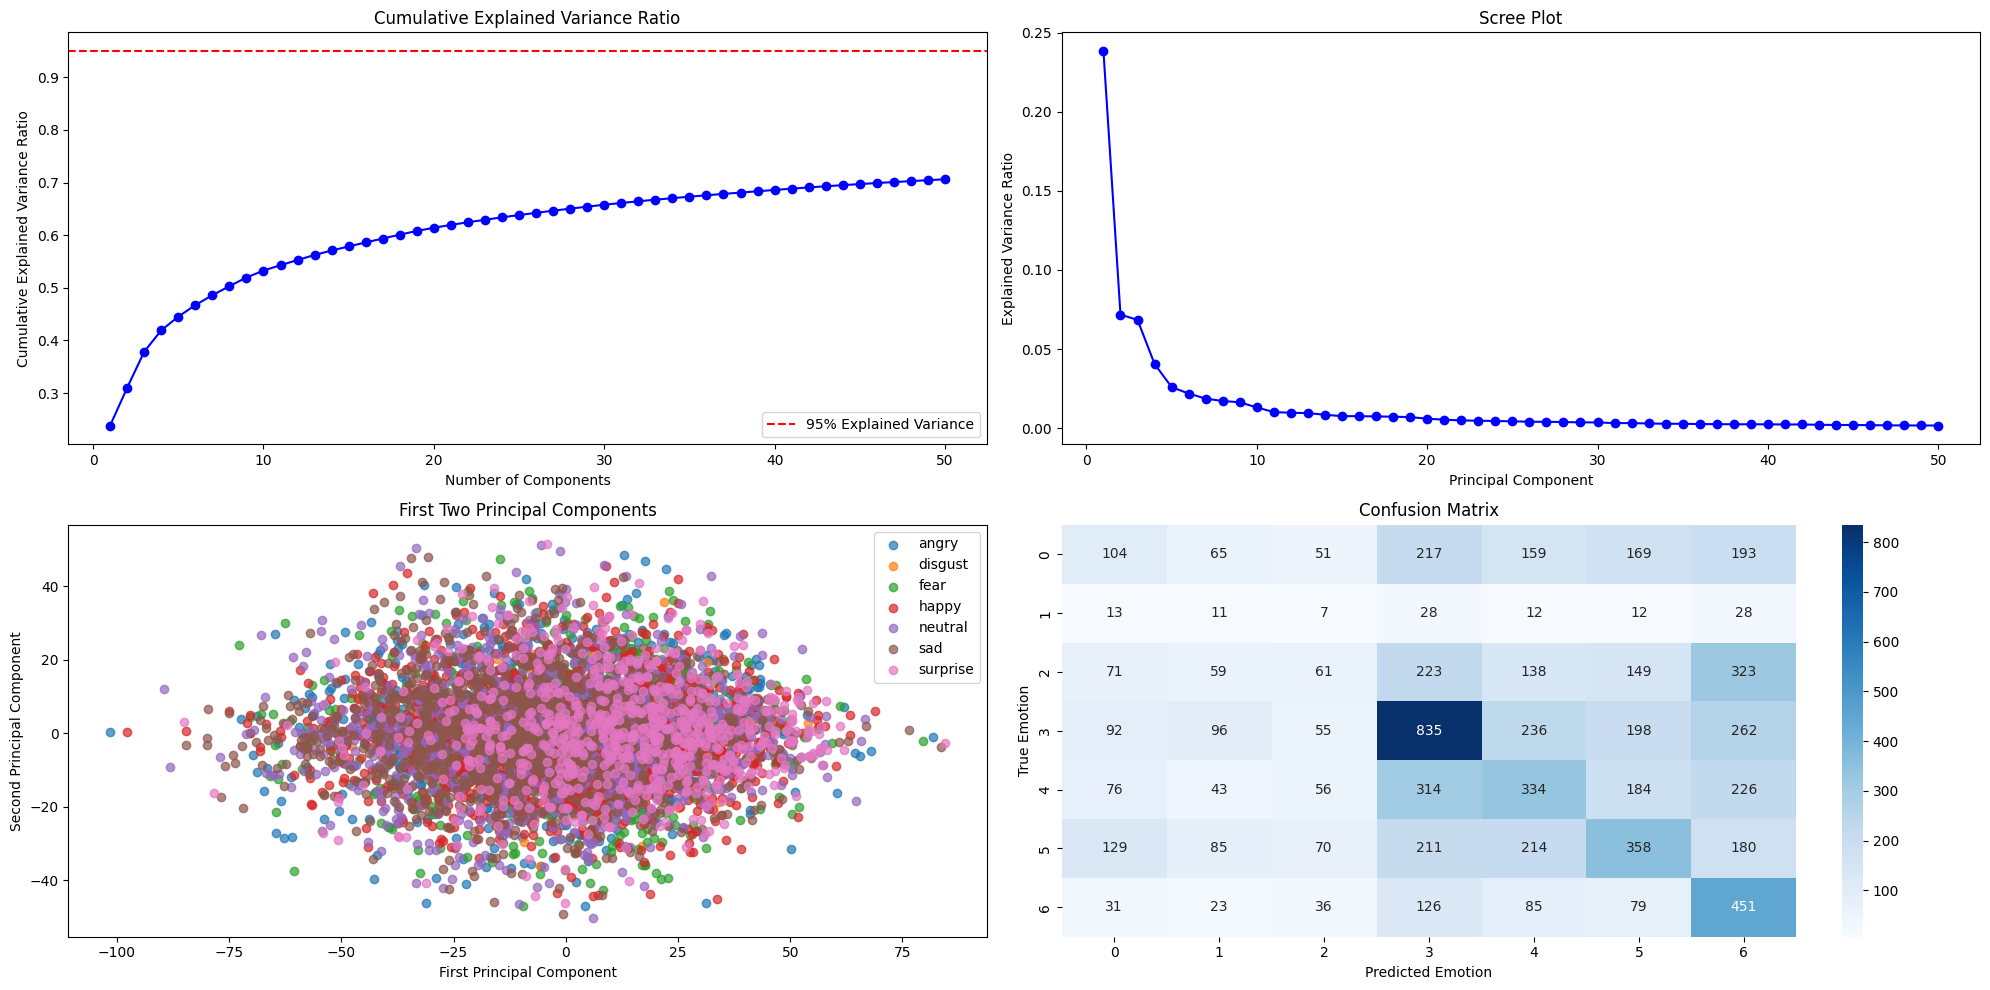

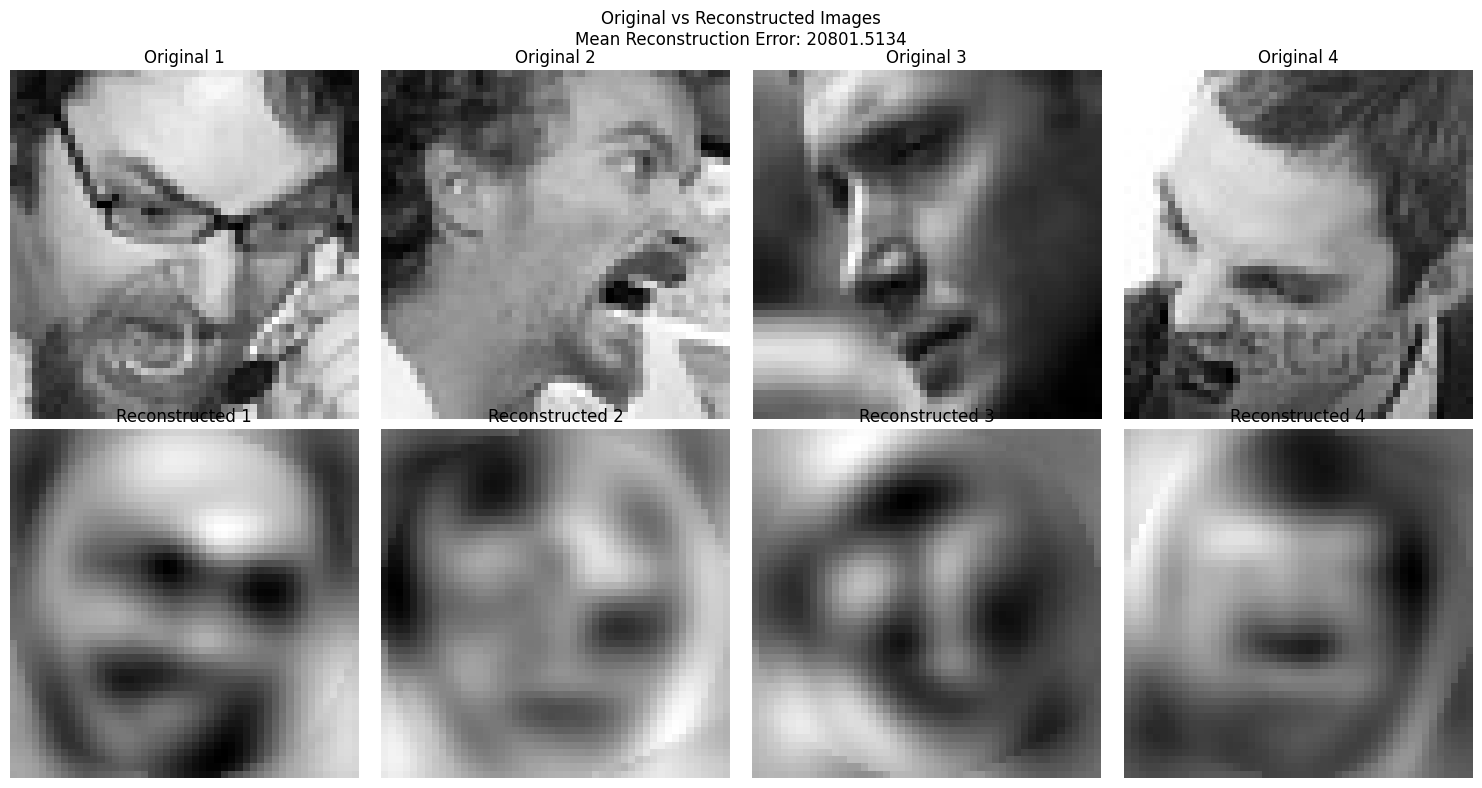


PCA Summary:
Number of components used: 50
Total explained variance ratio: 0.7063

Classification Report:
              precision    recall  f1-score   support

       angry       0.20      0.11      0.14       958
     disgust       0.03      0.10      0.04       111
        fear       0.18      0.06      0.09      1024
       happy       0.43      0.47      0.45      1774
     neutral       0.28      0.27      0.28      1233
         sad       0.31      0.29      0.30      1247
    surprise       0.27      0.54      0.36       831

    accuracy                           0.30      7178
   macro avg       0.24      0.26      0.24      7178
weighted avg       0.29      0.30      0.28      7178

Number of components used: 50


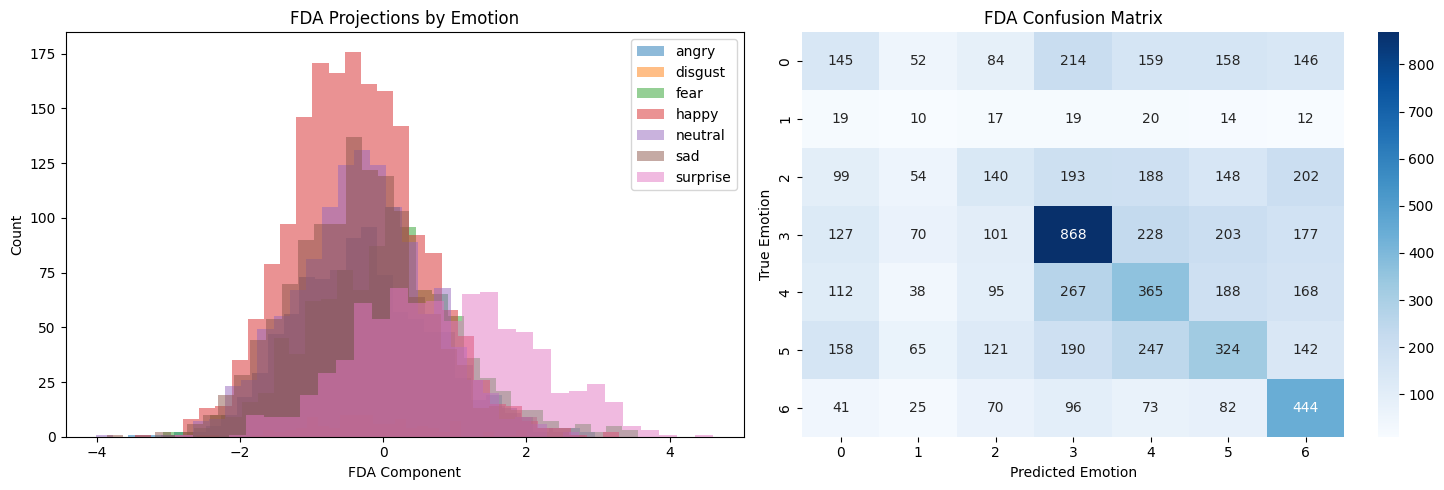


FDA Classification Report:
              precision    recall  f1-score   support

       angry       0.21      0.15      0.17       958
     disgust       0.03      0.09      0.05       111
        fear       0.22      0.14      0.17      1024
       happy       0.47      0.49      0.48      1774
     neutral       0.29      0.30      0.29      1233
         sad       0.29      0.26      0.27      1247
    surprise       0.34      0.53      0.42       831

    accuracy                           0.32      7178
   macro avg       0.26      0.28      0.26      7178
weighted avg       0.32      0.32      0.31      7178



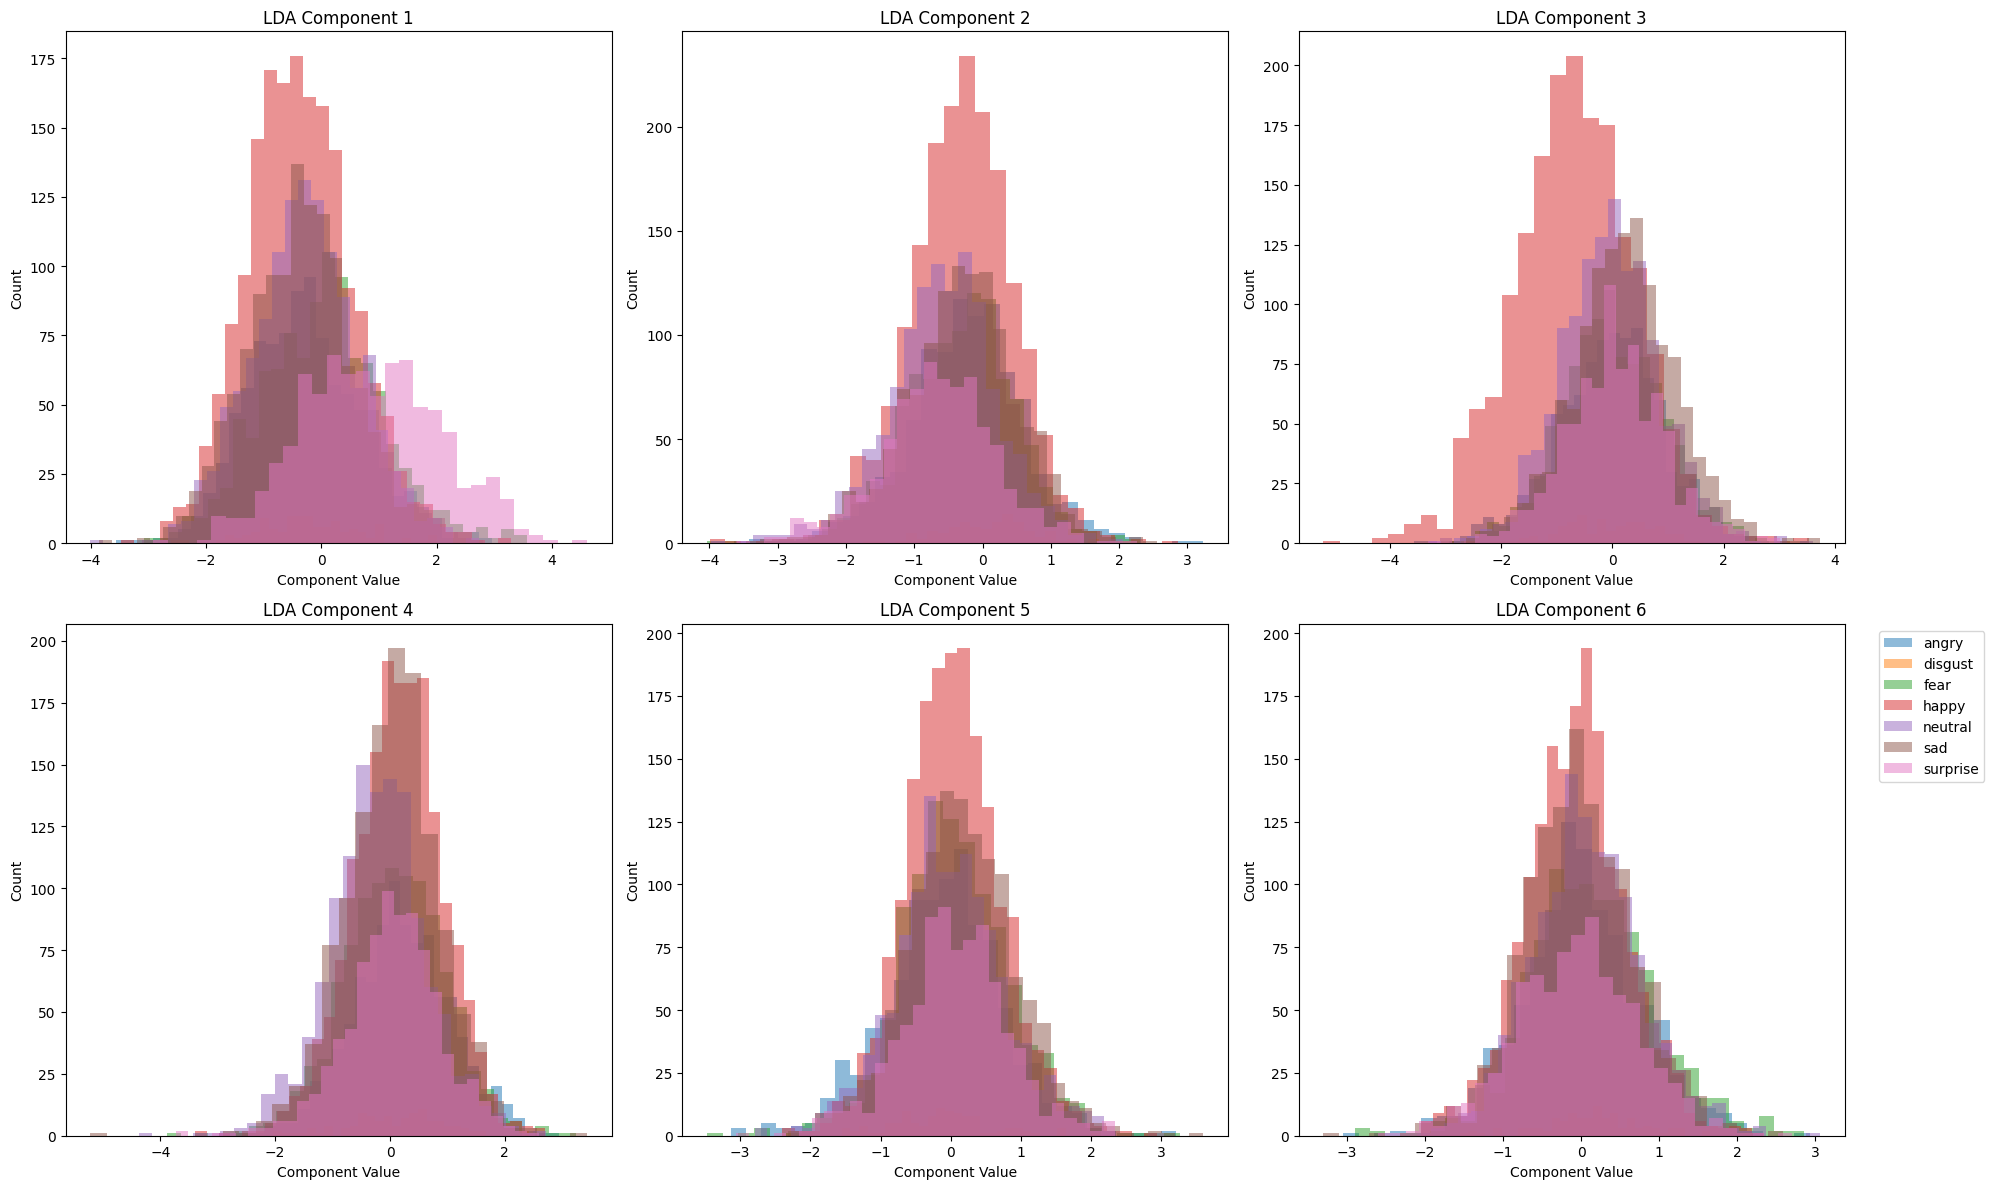

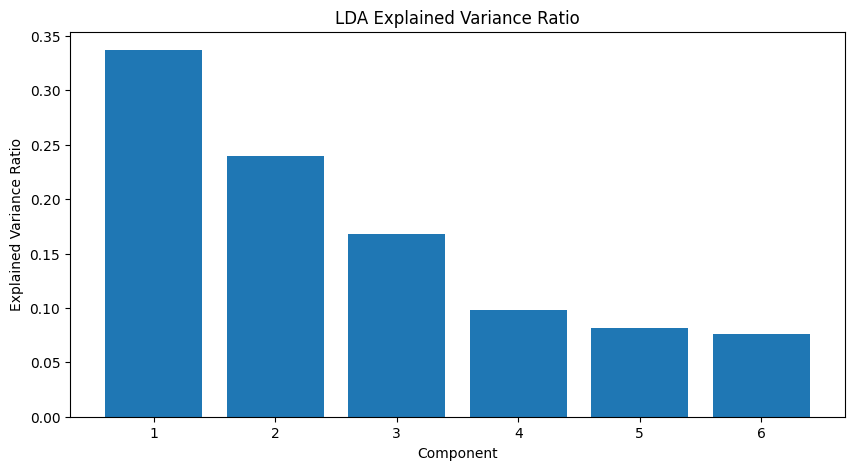

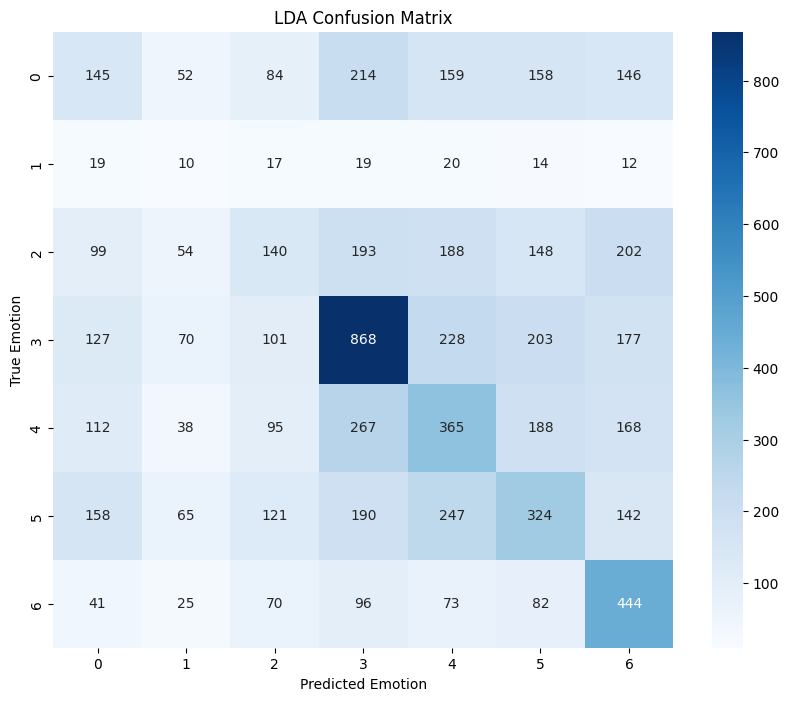


LDA Classification Report:
              precision    recall  f1-score   support

       angry       0.21      0.15      0.17       958
     disgust       0.03      0.09      0.05       111
        fear       0.22      0.14      0.17      1024
       happy       0.47      0.49      0.48      1774
     neutral       0.29      0.30      0.29      1233
         sad       0.29      0.26      0.27      1247
    surprise       0.34      0.53      0.42       831

    accuracy                           0.32      7178
   macro avg       0.26      0.28      0.26      7178
weighted avg       0.32      0.32      0.31      7178


LDA explained variance ratios: [0.33703679 0.23990856 0.16760231 0.09778879 0.08148558 0.07617796]


In [6]:
# Implementing PCA,FDA and LDA on our augmented and oversampled dataset

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def func_pca(train_images, test_images, n_components=0.95, plot_results=True):
   
    X_train,y_train,X_test,y_test = [],[],[],[]

    for label, images in train_images.items():
        for img in images:
            X_train.append(img.flatten())  
            y_train.append(label)
    
    for label, images in test_images.items():
        for img in images:
            X_test.append(img.flatten())
            y_test.append(label)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    # Scaling data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and fit PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    n_components_used = pca.n_components_
    
    # For Testing and Visualization
    classifier = LogisticRegression(max_iter=1000, multi_class='multinomial')
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    
    if plot_results:
        plt.figure(figsize=(20, 10))

        # Plot 1: Explained Variance Ratio
        plt.subplot(2, 2, 1)
        cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
        plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
        plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
        plt.title('Cumulative Explained Variance Ratio')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.legend()

        # Plot 2: Scree Plot
        plt.subplot(2, 2, 2)
        plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
        plt.title('Scree Plot')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')

        # Plot 3: First two components scatter plot
        plt.subplot(2, 2, 3)
        colors = sns.color_palette('tab10', len(np.unique(y_test)))
        for idx, label in enumerate(np.unique(y_test)):
            mask = y_test == label
            plt.scatter(X_test_pca[mask, 0], X_test_pca[mask, 1], label=label, alpha=0.7, color=colors[idx])
        plt.title('First Two Principal Components')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.legend()

        # Plot 4: Confusion Matrix
        plt.subplot(2, 2, 4)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Emotion')
        plt.ylabel('True Emotion')

        plt.tight_layout()
        plt.show()

        # Reconstruction Error Analysis
        if isinstance(n_components, int):
            X_test_reconstructed = pca.inverse_transform(X_test_pca)
            reconstruction_error = np.mean((X_test - X_test_reconstructed) ** 2)
            fig, axes = plt.subplots(2, 4, figsize=(15, 8))
            for i in range(4):
                axes[0, i].imshow(X_test[i].reshape(48, 48), cmap='gray')
                axes[0, i].set_title(f'Original {i+1}')
                axes[0, i].axis('off')

                axes[1, i].imshow(X_test_reconstructed[i].reshape(48, 48), cmap='gray')
                axes[1, i].set_title(f'Reconstructed {i+1}')
                axes[1, i].axis('off')

            plt.suptitle(f'Original vs Reconstructed Images\nMean Reconstruction Error: {reconstruction_error:.4f}')
            plt.tight_layout()
            plt.show()

        # Printing summary statistics
        print(f"\nPCA Summary:")
        print(f"Number of components used: {n_components_used}")
        print(f"Total explained variance ratio: {np.sum(pca.explained_variance_ratio_):.4f}")
        print(f"\nClassification Report:")
        print(classification_report(y_test, y_pred))

    return {
        'model': pca,
        'classifier': classifier,
        'X_train_transformed': X_train_pca,
        'X_test_transformed': X_test_pca,
        'predictions': y_pred,
        'y_true': y_test,
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'n_components_used': n_components_used,
        'cumulative_variance_ratio': np.cumsum(pca.explained_variance_ratio_)
    }

def func_fda(train_images, test_images, plot_results=True):
   
    X_train,y_train,X_test,y_test = [],[],[],[]

    for label, images in train_images.items():
        for img in images:
            X_train.append(img.flatten()) 
            y_train.append(label)

    for label, images in test_images.items():
        for img in images:
            X_test.append(img.flatten())
            y_test.append(label)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    # Scaling data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Implementing FDA (LDA with n_components=1)
    fda = LinearDiscriminantAnalysis(n_components=1)
    
    X_train_fda = fda.fit_transform(X_train_scaled, y_train)
    X_test_fda = fda.transform(X_test_scaled)
    y_pred = fda.predict(X_test_scaled)
    
    if plot_results:
        plt.figure(figsize=(15, 5))
        
        # Plot 1: FDA Projections
        
        plt.subplot(1, 2, 1)
        colors = sns.color_palette('tab10', len(np.unique(y_test)))
        for idx, label in enumerate(np.unique(y_test)):
            mask = y_test == label
            plt.hist(X_test_fda[mask], alpha=0.5, label=label, bins=30, color=colors[idx])
        plt.title('FDA Projections by Emotion')
        plt.xlabel('FDA Component')
        plt.ylabel('Count')
        plt.legend()
        
        # Plot 2: Confusion Matrix
        plt.subplot(1, 2, 2)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('FDA Confusion Matrix')
        plt.xlabel('Predicted Emotion')
        plt.ylabel('True Emotion')

        plt.tight_layout()
        plt.show()
        
     # Printing classification report
        print("\nFDA Classification Report:")
        print(classification_report(y_test, y_pred))
    
    return {
        'model': fda,
        'X_train_transformed': X_train_fda,
        'X_test_transformed': X_test_fda,
        'predictions': y_pred,
        'y_true': y_test,
        'explained_variance_ratio': fda.explained_variance_ratio_
    }

def func_lda(train_images, test_images, plot_results=True):
    X_train,y_train,X_test,y_test = [],[],[],[]
   
    for label, images in train_images.items():
        for img in images:
            X_train.append(img.flatten())
            y_train.append(label)

    for label, images in test_images.items():
        for img in images:
            X_test.append(img.flatten())
            y_test.append(label)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    # Scaling data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Implementing LDA with 6 components (Number of Classes(7)-1)
    lda = LinearDiscriminantAnalysis(n_components=6)
    
    X_train_lda = lda.fit_transform(X_train_scaled, y_train)
    X_test_lda = lda.transform(X_test_scaled)
    y_pred = lda.predict(X_test_scaled)
    
    if plot_results:
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        axes = axes.ravel()
        
        # Plotting distribution of each component
        colors = sns.color_palette('tab10', len(np.unique(y_test)))
        for i in range(6):
            for idx, label in enumerate(np.unique(y_test)):
                mask = y_test == label
                axes[i].hist(X_test_lda[mask, i], alpha=0.5, label=label, bins=30, color=colors[idx])
            axes[i].set_title(f'LDA Component {i+1}')
            axes[i].set_xlabel('Component Value')
            axes[i].set_ylabel('Count')

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        # Plotting explained variance ratio
        plt.figure(figsize=(10, 5))
        plt.bar(range(1, 7), lda.explained_variance_ratio_)
        plt.title('LDA Explained Variance Ratio')
        plt.xlabel('Component')
        plt.ylabel('Explained Variance Ratio')
        plt.show()
        
        # Plotting confusion matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('LDA Confusion Matrix')
        plt.xlabel('Predicted Emotion')
        plt.ylabel('True Emotion')
        plt.show()
        
        # Printing classification report
        print("\nLDA Classification Report:")
        print(classification_report(y_test, y_pred))
    
    return {
        'model': lda,
        'X_train_transformed': X_train_lda,
        'X_test_transformed': X_test_lda,
        'predictions': y_pred,
        'y_true': y_test,
        'explained_variance_ratio': lda.explained_variance_ratio_
    }

# For Running PCA Analysis

  # a) Using explained variance ratio (95%)
pca_results = func_pca(train_images, test_images, n_components=0.95)
print("Total explained variance:", sum(pca_results['explained_variance_ratio']))

  # b) Using fixed number of components
pca_results = func_pca(train_images, test_images, n_components=50)
print("Number of components used:", pca_results['n_components_used'])


# For running FDA analysis
fda_results = func_fda(train_images, test_images)


# For running LDA analysis
lda_results = func_lda(train_images, test_images)
print("\nLDA explained variance ratios:", lda_results['explained_variance_ratio'])